# Select and run analyses


<class 'numpy.ndarray'>


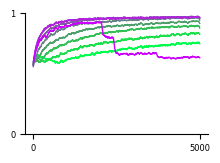

In [6]:
### Plot accuracies
model = 'met_FB3'
experiment = 'swLR'
key = 'loadAcc'; dataName = 'accTr'
accTr = esn_feedback_ana(key,modName=model,expName=experiment,dataName=dataName)
key = 'loadAcc'; dataName = 'accVal'
accVal = esn_feedback_ana(key,modName=model,expName=experiment,dataName=dataName)
key = 'plotAcc'; 
esn_feedback_ana(key,accTr=accTr,accVal=accVal,saveFlag=False, figDir='./figs/'+model+'_'+experiment+'/')

In [11]:
# To estimate which LR to use for further analyses
tuple(np.max(np.mean(accVal[i][:,-100:], axis=1)) for i in range(len(accVal)))
# np.max(np.mean(accVal[6][:,-10:],axis=1))

(0.7775000023841858,
 0.8362500011920929,
 0.8962500029802323,
 0.9357500022649765,
 0.9610000026226043,
 0.965250004529953,
 0.9637500071525573,
 0.9610000032186509,
 0.9355000013113022)

In [10]:
np.mean(SI)

0.24090683071319619

0.0


/home/jb739/apps/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:545: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/tmp/ipykernel_35095/1801896395.py:125: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(pc[j*10:(j+1)*10,0], pc[j*10:(j+1)*10,1], s=3, c=col)
/tmp/ipykernel_35095/1801896395.py:174: RuntimeWarning: invalid value encountered in divide
  SI = np.divide(b - a, np.expand_dims(np.max(np.concatenate((a,b), axis=1), axis=1), axis=1))
/tmp/ipykernel_35095/1801896395.py:188: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will 

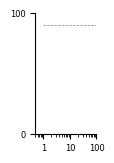

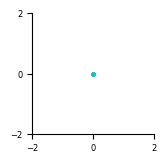

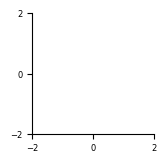

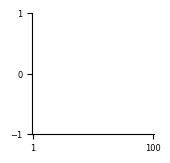

In [13]:
### Plot response examples
saveFlag=False
# Load data
model = 'met_FB0'; experiment = 'swLR'; key = 'loadResp'; dataName = 'respSave11119'
r = esn_feedback_ana(key,modName=model,expName=experiment,dataName=dataName,selectLR=6,maxNSeeds=1,layer=1)
# Compute principle components
key = 'computePCA'
p, *pca = esn_feedback_ana(key,data=r[0])
# Plot PCs
key = 'plotPCA'
esn_feedback_ana(key,data=r[0], pca=pca[0], pc=p, saveTime=-2, saveFlag=saveFlag, figDir='./figs/'+model+'_'+experiment+'/')
# Compute Clustering Index
key = 'clusterIndex'
SI = esn_feedback_ana(key,data=r[0])
# Plot cluster indeces
key = 'plotClusterIndex'; figDir = './figs/'+model+'_'+experiment+'/'
esn_feedback_ana(key, ci=SI, figDir=figDir, saveFlag=saveFlag)
# Plot mean SI across runs for all models
key = 'plotMeanSI'; 
esn_feedback_ana(key)

In [ ]:
### Plot results summary for all models
key = 'allSI'
si = esn_feedback_ana(key, prefix='met_')
key = 'plotAllSI'; figDir='./figs/swLR'
esn_feedback_ana(key, si=si, figDir=figDir, saveFlag=False)
print(si)


# Define analyses functions

[ 7.21249671e-05 -4.68663052e-02 -2.38955364e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


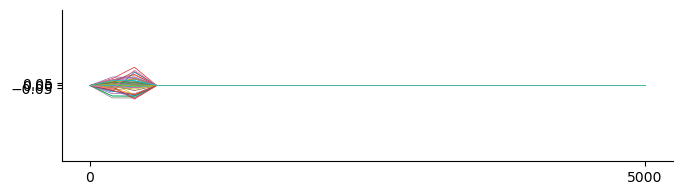

In [8]:
weights=torch.load('/home/jb739/sheffield/proj/esn2sparse/data/met_FB3_swLR_'+LR[9]+'/weightSave'+SD[1]+'.pt')
fig = pl.figure(figsize=tuple(np.array((20.,5.))/2.54)); ax = pl.axes()
ax.spines[['top','right']].set_visible(False)
for j in range(0,1000,100):
    pl.plot(np.linspace(1,5000,26),weights[::2,j,:].transpose(), linewidth=0.5)
ax.xaxis.set_ticks((0,5000)); ax.yaxis.set_ticks((-.05,0,.05)); ax.set_ylim(-1.5,1.5)
print(weights[0,0,:])

In [1]:
import glob as gl
import os
import numpy as np
import torch
import matplotlib.pyplot as pl
import matplotlib as mpl
import myutils as mu

In [12]:
def esn_feedback_ana(key,**kwa):
        
    ### Load accuracy data
    if key=='loadAcc':
        # kwa needs: modName, expName, dataName
        baseDirName = '/home/jb739/sheffield/proj/esn2sparse/data/'+kwa['modName']+'_'+kwa['expName']+'_*'
        dataDirNames = gl.glob(baseDirName); dataDirNames.sort()
        data = []
        for j,d in enumerate(dataDirNames): # loop over learning rates
            baseFileName = d+'/'+kwa['dataName']+'*'
            fNames = gl.glob(baseFileName); fNames.sort()
            data.append(np.expand_dims(np.array(torch.load(fNames[0])), axis=0))
            for k in range(1,len(fNames)): # loop over runs (random seeds)
                data[j] = np.concatenate((data[j], np.expand_dims(np.array(torch.load(fNames[k])), axis=0)), axis=0)

        return data
    
    ### Plot accuracies
    if key=='plotAcc':
        # kwa needs: accTr, accVal, saveFlag, figDir, 
        mu.setupMatplotlib()
        accTr = kwa['accTr']
        accVal = kwa['accVal']
        nEpochs = accTr[0].shape[1]
        n = len(accTr)
        colTr1 = np.array(tuple(x**2 for x in (0.,0.3,1.))); colTr2 = np.array(tuple(x**2 for x in (1., 0.5, 0.)))
        print(type(colTr1))
        colVal1 = np.array(tuple(x**2 for x in (0.,1.,0.3))); colVal2 = np.array(tuple(x**2 for x in (0.8, 0., 1.)))
        colShade = np.linspace(0.,1.,n)
        kernel = np.ones(50)/50
        fig = pl.figure(figsize=tuple(np.array((6.,4.))/2.54)); ax = pl.axes()
        ax.spines[['top','right']].set_visible(False)
        for j in range(n):
            colTr = tuple(np.sqrt(colShade[j]**2 * colTr2 + colShade[n-1-j]**2 * colTr1))
            colVal = tuple(np.sqrt(colShade[j]**2 * colVal2 + colShade[n-1-j]**2 * colVal1))
            # pl.plot(np.linspace(1,nEpochs,nEpochs),np.convolve(np.pad(np.mean(accTr[j],0), (50,50), mode='edge'),kernel,mode='same')[50:-50], linewidth=1.0, color=colTr)
            pl.plot(np.linspace(1,nEpochs,nEpochs),np.convolve(np.pad(np.mean(accVal[j],0), (50,50), mode='edge'),kernel,mode='same')[50:-50], linewidth=1.0, color=colVal)
        ax.xaxis.set_ticks((0,nEpochs)); ax.yaxis.set_ticks((0,1))
        if kwa['saveFlag']:
            mu.checkMakeDir(kwa['figDir'])
            pl.savefig(kwa['figDir']+'/accTrVal.svg', format="svg")
    
    ### Load saved responses
    if key=='loadResp':
        # kwa needs: modName, expName, dataName, selectLR, maxNSeeds, layer
        baseDirName = '/home/jb739/sheffield/proj/esn2sparse/data/'+kwa['modName']+'_'+kwa['expName']+'_*'
        dataDirNames = gl.glob(baseDirName); dataDirNames.sort()
        data = []
        for j,d in enumerate(dataDirNames): # For each learning rate
            if j!=kwa['selectLR']: # For selected best learning rate
                continue
            baseFileName = d+'/'+kwa['dataName']+'*'
            fNames = gl.glob(baseFileName); fNames.sort()
            for f, fName in enumerate(fNames): # For each seed
                if f==kwa['maxNSeeds']: # Only process maxNSeeds seeds
                    break
                # Load response data from fName (1 layer only)
                r = torch.load(fName)[kwa['layer']] 
                # Create new list element for r-data, with shape [#iterations saved, #samples, #neurons x #time steps]
                # data.append(np.reshape(r, (r.shape[0], r.shape[1], r.shape[2]*r.shape[3]))) 
                data.append(r) 

        return data
    
    ### Compute principle components
    if key=='computePCA':
        # kwa needs: data
        from sklearn.decomposition import PCA
        from scipy import stats
        # Preprocess data
        if len(kwa['data'].shape)>3:
            data = kwa['data'][-2,:,:,:]
        else:
            data = kwa['data']
        # for j in range(data.shape[0]):
        #     data[j,:,:] = stats.zscore(data[j,:,:])
        # Init PCA object
        pca = PCA(n_components=100)
        # Perform PCA and return transformed data (last saved time point)
        # p = pca.fit_transform(np.mean(data[-2,:,:]))
        print(np.sum(np.double(np.isnan(data))))
        p = pca.fit_transform(np.mean(data[:,:,-5:], axis=2))
        return p, pca
    
    ### Plot class trajectories and clusters in PCA space
    if key=='plotPCA':
        # kwa needs: data, pca, pc, saveTime, saveFlag, figDir, 
        ### Process inputs
        data = kwa['data'] # Responses
        pca = kwa['pca'] # PCA function
        pc = kwa['pc'] # 1st 2 PCs that define PC space
        var = np.cumsum(np.array(list(x*100 for x in pca.explained_variance_ratio_)))
        if len(kwa['data'].shape)>3:
            nt = data.shape[3]
        else:
            nt = data.shape[2]
        mapData = np.zeros((data.shape[1], 2, nt))
        if len(kwa['data'].shape)>3:
            for t in range(nt):
                mapData[:,:,t] = pca.transform(data[kwa['saveTime'],:,:,t])[:,0:2]
        else:
            for t in range(nt):
                mapData[:,:,t] = pca.transform(data[:,:,t])[:,0:2]
        
        ### Generate figures
        mu.setupMatplotlib()
        # Plot variance explained
        fig = pl.figure(figsize=tuple(np.array((2.,4.))/2.54)); ax = pl.axes()
        ax.spines[['top','right']].set_visible(False)
        pl.scatter(np.linspace(1,100,var.shape[0]), var, s=3,c='k', alpha=0.5)
        pl.plot(np.linspace(1,100,2), np.ones(2)*90, '--', color=(0.5, 0.5, 0.5), linewidth=0.5)
        ax.set_xscale('log')
        # pl.xticks([1,10,100], ['1','10','100'], minor=[2,3,4,5,6,7,8,9,20,30,40,50,60,70,80,90])
        ax.xaxis.set_ticks((1,10,100)); ax.yaxis.set_ticks((0,100))
        ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
        ax.set_xlim(xmin=0.5, xmax=100); ax.set_ylim(ymin=0, ymax=100)
        if kwa['saveFlag']:
            mu.checkMakeDir(kwa['figDir'])
            pl.savefig(kwa['figDir']+'varExplained.svg', format="svg")
        # Plot PCA clusters
        fig = pl.figure(figsize=tuple(np.array((4.,4.))/2.54)); ax = pl.axes()
        ax.spines[['top','right']].set_visible(False)
        for j in range(10):
            col = mpl.colormaps['tab10'].colors[j]
            pl.scatter(pc[j*10:(j+1)*10,0], pc[j*10:(j+1)*10,1], s=3, c=col)
        ax.xaxis.set_ticks((-10,0,10)); ax.yaxis.set_ticks((-10,0,10))
        ax.set_xlim(xmin=-16, xmax=16); ax.set_ylim(ymin=-16, ymax=16)
        if kwa['saveFlag']:
            mu.checkMakeDir(kwa['figDir'])
            pl.savefig(kwa['figDir']+'pcaClusters.svg', format="svg")
        ### Plot mean class response trajectory in PC space
        fig = pl.figure(figsize=tuple(np.array((4.,4.))/2.54)); ax = pl.axes()
        ax.spines[['top','right']].set_visible(False)
        scale = np.logspace(-1,0,nt)
        for j in range(10):
            col = mpl.colormaps['tab10'].colors[j]
            for t in range(mapData.shape[2]-1):
                colT = tuple(x**scale[t] for x in col)
                pl.plot(np.mean(mapData[j*10:(j+1)*10,0,t:t+2], axis=0), np.mean(mapData[j*10:(j+1)*10,1,t:t+2], axis=0), color=colT, linewidth=1)
        ax.xaxis.set_ticks((-10,0,10)); ax.yaxis.set_ticks((-10,0,10))
        ax.set_xlim(xmin=-16, xmax=16); ax.set_ylim(ymin=-16, ymax=16)
        if kwa['saveFlag']:
            mu.checkMakeDir(kwa['figDir'])
            pl.savefig(kwa['figDir']+'pcaTraj.svg', format="svg")
    
    ### Compute clustering index
    if key=='clusterIndex':
        # kwa needs: data
        ### Compute Silhuoette Index
        if len(kwa['data'].shape)>3:
            r = np.mean(kwa['data'][-2,:,:,-5:], axis=2)
        else:
            r = np.mean(kwa['data'][:,:,-5:], axis=2)
        ns = r.shape[0] # No. samples
        nc = 10 # No. clusters
        dist = np.zeros((r.shape[0], r.shape[0]))
        # Compute distances between samples
        for j in range(ns):
            dist[:,j] = np.sqrt(np.sum((r - np.roll(r, -j, axis=0))**2, axis=1))
        # Rearrange dist to yield distance matrix
        # Fill diagonal of dist matrix with NaNs
        for j in range(ns):
            dist[j,:] = np.roll(np.expand_dims(dist[j,:], axis=0), j, axis=1)
            dist[j,j] = np.NaN
        # Compute mean distance from each sample to each cluster
        mDist = np.zeros((ns, nc))
        for j in range(nc):
            mDist[:,j] = np.nanmean(dist[:,j*10:(j+1)*10], axis=1)
        # Rearrange mDist so that each sample's own cluster is in first column
        for j in range(nc):
            mDist[j*10:(j+1)*10,:] = np.roll(mDist[j*10:(j+1)*10,:], -j, axis=1)
        # Calculate Silhuoette Index
        a = np.expand_dims(mDist[:,0], axis=1); b = np.expand_dims(np.min(mDist[:,1:], axis=1), axis=1)
        SI = np.divide(b - a, np.expand_dims(np.max(np.concatenate((a,b), axis=1), axis=1), axis=1))

        return SI
    
    ### Plot cluster indeces
    if key=='plotClusterIndex':
        # kwa needs: ci, figDir, saveFlag
        ci = kwa['ci']
        mu.setupMatplotlib()
        fig = pl.figure(figsize=tuple(np.array((4.,4.))/2.54)); ax = pl.axes()
        ax.spines[['top','right']].set_visible(False)
        for j in range(10):
            col = mpl.colormaps['tab10'].colors[j]
            # pl.plot(np.linspace(j*10+1,(j+1)*10,10), ci[j*10:(j+1)*10], linewidth=1, color=col)
            pl.scatter(np.linspace(j*10+1,(j+1)*10,10), ci[j*10:(j+1)*10], s=3, c=col)
        pl.plot(np.linspace(0,101,2), np.ones(2)*np.mean(ci), '--', color=(0.5, 0.5, 0.5), linewidth=0.5)
        ax.xaxis.set_ticks((1,100)); ax.yaxis.set_ticks((-1,0,1))
        ax.set_xlim(xmin=0, xmax=101); ax.set_ylim(ymin=-1, ymax=1)
        if kwa['saveFlag']:
            mu.checkMakeDir(kwa['figDir'])
            pl.savefig(kwa['figDir']+'clusterIndex.svg', format="svg")

    ### Plot mean cluster indeces across runs for all models
    if key=='allSI':
        # kwa needs: prefix
        # Load data and compute silhouette indeces
        models = ('FB0', 'FB1', 'FB2', 'FB3')
        experiment = 'swLR'
        si = np.zeros((len(models), 5))
        for j, model in enumerate(models):
            dirNames = gl.glob('data/'+kwa['prefix']+model+'_'+experiment+'_*'); dirNames.sort(); dirName = dirNames[6]
            dataName = 'respSave'
            r = esn_feedback_ana('loadResp',modName=model,expName=experiment,dataName=dataName,selectLR=6,maxNSeeds=5,layer=1)
            for k in range(len(r)):
                si[j,k] = np.mean(esn_feedback_ana('clusterIndex',data=r[k]))

        return si
        
    ### Plot all mean SIs
    if key=='plotAllSI':
        # kwa needs: si, figDir
        si = kwa['si']
        mSI = np.mean(si,axis=1)
        sSI = np.std(si, axis=1)
        mu.setupMatplotlib()
        fig = pl.figure(figsize=tuple(np.array((4.,4.))/2.54)); ax = pl.axes()
        ax.spines[['top','right']].set_visible(False)
        for j in range(si.shape[0]):
            pl.scatter(j+np.random.uniform(-0.25,0.25,(si.shape[1],1)), si[j,:], c=(0., 0., 0., 0.33), s=3)
        pl.errorbar(list(range(4)), mSI, yerr=sSI, fmt='o', color='k', markersize=3)
        ax.xaxis.set_ticks(list(range(4))); ax.yaxis.set_ticks((-1,0,1))
        ax.set_xlim(xmin=-0.5, xmax=3.5); ax.set_ylim(ymin=-1, ymax=1)
        if kwa['saveFlag']:
            mu.checkMakeDir(kwa['figDir'])
            pl.savefig(kwa['figDir']+'/allSI.svg', format="svg")

    ### Plot delta_w 
    if key=='plotDW':
       baseDirName = '/home/jb739/sheffield/proj/esn2sparse/data/'+kwa['modName']+'_'+kwa['expName']+'_*'
       complete = torch.load('/home/jb739/sheffield/proj/esn2sparse/data/'+kwa['modName']+'_'+kwa['expName']+'_0/complete.pt')  
       dw = esn_feedback_ana('loadAcc', 'modName', modName, 'expName', expName, 'dataName', dw)
       
      # kwa needs: modName, expName, dataName
        


        


In [87]:
print(np.logspace(-5,-2,10))

[1.00000000e-05 2.15443469e-05 4.64158883e-05 1.00000000e-04
 2.15443469e-04 4.64158883e-04 1.00000000e-03 2.15443469e-03
 4.64158883e-03 1.00000000e-02]
